In [1]:
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import time
import timeit

In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress = True)

## Load the Data

This data has already been run through the Factor Analysis notebook.

In [3]:
df = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED_CLUSTERED.csv")

In [4]:
df.shape

(2909, 73)

In [5]:
# Drop the extra index column created when the data is loaded
df.drop(df.columns[0], axis=1, inplace=True)

# SAVE SOME GLOBAL VARIABLES
DF_COL_NAMES = df.columns

FIPS_STATE = df['FIPS_STATE_CODE']
FIPS_COUNTY = df['FIPS_COUNTY_CODE']
FIPS = df['FIPS']
STATE = df["STATE"]
COUNTY = df["COUNTY"]
CBSA = df["CBSA"]

# We won't be clustering object / string data
df.drop(["STATE", "COUNTY", "FIPS", "CBSA"], axis=1, inplace=True)

df.head()

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,HF_PROP_RANK,HF_QUARTILE,HF_HIGH,HIGH_SEV,HIGH_PROCS,DIVERSE_PROP,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS
0,1.0,1.0,16,13,65.4,0.187500,3.0,3.0,5.0,112,...,0.851,1.0,1.0,0.0,1.0,0.312500,-0.250884,0.785873,-0.122812,1
1,1.0,3.0,95,65,70.3,0.463158,18.0,8.0,18.0,720,...,0.955,1.0,1.0,1.0,1.0,0.368421,0.659104,-0.431479,0.216796,3
2,1.0,5.0,14,12,72.4,0.642857,0.0,0.0,4.0,92,...,0.194,4.0,0.0,1.0,0.0,0.500000,-0.230425,-0.469385,0.223178,3
3,1.0,7.0,17,12,69.0,0.411765,2.0,3.0,4.0,152,...,0.716,2.0,1.0,1.0,1.0,0.294118,0.538031,0.253332,-0.200188,3
4,1.0,9.0,22,12,68.8,0.636364,4.0,1.0,4.0,86,...,0.866,1.0,1.0,0.0,0.0,0.409091,-0.354058,-1.479527,0.082009,2


## tSNE

Apply tSNE Dimension Reduction to the same subset of variables used for Factor Analysis.

TOT_VSTS_PB
Total Visits per Beneficiary

CNTY_IP_PROP
The Proportion of Visits that are Inpatient

CODES_PU
The Number of Codes per User (A User is a beneficiary with >0 claims for the period (2008-2010))

PROCS_PU
The Number of Procedures per User (based on HCPCS Level 1 Codes)

PRVDRS_PU
The Number of Providers per User

TOT_IPDAYS_PU The Total Number of Inpatient Days per User

TOT_CC_PREV
The Total Number of Chronic Conditions / The Number of Beneficiaries in the County

TOT_CC_INCD
The Total # of New Chronic Conditions during the period / The # of Beneficiaries in the County

TOT_ELIX_PU
The Sum of all the Avg Elixhauser Scores for all the Users in the County / # of Users

TOT_COST_PB
The Total Cost / Number of Beneficiaries in the County

HF_PROP_RANK
The RWJF Health Factors Proportionate Rank for the County

DIVERSE_PROP
The Proportion of people in the county whose self-identified race is not white.

In [6]:
analysis_ds = df[["TOT_VSTS_PB", "CNTY_IP_PROP","CODES_PU", "PROCS_PU", "PRVDRS_PU", 
                  "TOT_IPDAYS_PU", "TOT_CC_PREV", "TOT_CC_INCD", "TOT_ELIX_PU", "TOT_COST_PB", 
                  "HF_PROP_RANK", "DIVERSE_PROP"]]


analysis_ds = analysis_ds.dropna()
analysis_ds.shape

(2873, 12)

## Standardize the Data

In [7]:
import sklearn.preprocessing as pre

s = pre.StandardScaler()
analysis_ds = s.fit_transform(analysis_ds)

## Apply tSNE Reduction

Approximate execution time: 34 seconds

In [8]:
start_time = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=123)
reduced_ds = tsne.fit_transform(analysis_ds)
end_time = time.time()
print("Total run time = %.3f seconds" %(end_time - start_time))

Total run time = 25.312 seconds


In [9]:
reduced_ds

array([[  1.858,  -3.334,   7.042],
       [  8.748,  -1.61 ,   5.529],
       [-11.704,  -3.52 ,  -4.75 ],
       ...,
       [ -1.161,   3.867, -14.989],
       [ -9.699,  12.448,  10.743],
       [ -4.586,   9.767,   3.659]], dtype=float32)

In [10]:
TSNE = pd.DataFrame(reduced_ds, columns = ["TSNE_1", "TSNE_2", "TSNE_3"])


In [11]:
df.shape

(2909, 68)

In [12]:
df.iloc[:, 0:68]

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,HF_PROP_RANK,HF_QUARTILE,HF_HIGH,HIGH_SEV,HIGH_PROCS,DIVERSE_PROP,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS
0,1.0,1.0,16,13,65.4,0.187500,3.0,3.0,5.0,112,...,0.851,1.0,1.0,0.0,1.0,0.312500,-0.250884,0.785873,-0.122812,1
1,1.0,3.0,95,65,70.3,0.463158,18.0,8.0,18.0,720,...,0.955,1.0,1.0,1.0,1.0,0.368421,0.659104,-0.431479,0.216796,3
2,1.0,5.0,14,12,72.4,0.642857,0.0,0.0,4.0,92,...,0.194,4.0,0.0,1.0,0.0,0.500000,-0.230425,-0.469385,0.223178,3
3,1.0,7.0,17,12,69.0,0.411765,2.0,3.0,4.0,152,...,0.716,2.0,1.0,1.0,1.0,0.294118,0.538031,0.253332,-0.200188,3
4,1.0,9.0,22,12,68.8,0.636364,4.0,1.0,4.0,86,...,0.866,1.0,1.0,0.0,0.0,0.409091,-0.354058,-1.479527,0.082009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,55.0,101.0,103,79,72.8,0.388350,11.0,10.0,22.0,717,...,0.111,4.0,0.0,0.0,0.0,0.087379,-0.237990,-1.348627,-0.568741,2
2905,55.0,103.0,9,4,80.0,0.666667,1.0,0.0,1.0,32,...,0.639,2.0,1.0,0.0,0.0,0.000000,-0.048580,-1.145311,-0.246286,2
2906,55.0,105.0,57,44,72.4,0.385965,2.0,3.0,6.0,417,...,0.139,4.0,0.0,0.0,0.0,0.070175,-0.398211,-1.641017,-0.858086,2
2907,55.0,107.0,14,8,68.2,0.571429,2.0,2.0,3.0,59,...,0.375,3.0,0.0,1.0,0.0,0.000000,0.278733,-1.988062,-0.674526,2


In [13]:
merged = df.merge(TSNE, left_index=True, right_index=True)
merged

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,HIGH_SEV,HIGH_PROCS,DIVERSE_PROP,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS,TSNE_1,TSNE_2,TSNE_3
0,1.0,1.0,16,13,65.4,0.187500,3.0,3.0,5.0,112,...,0.0,1.0,0.312500,-0.250884,0.785873,-0.122812,1,1.858443,-3.334387,7.042188
1,1.0,3.0,95,65,70.3,0.463158,18.0,8.0,18.0,720,...,1.0,1.0,0.368421,0.659104,-0.431479,0.216796,3,8.747828,-1.609500,5.528738
2,1.0,5.0,14,12,72.4,0.642857,0.0,0.0,4.0,92,...,1.0,0.0,0.500000,-0.230425,-0.469385,0.223178,3,-11.704071,-3.519831,-4.749842
3,1.0,7.0,17,12,69.0,0.411765,2.0,3.0,4.0,152,...,1.0,1.0,0.294118,0.538031,0.253332,-0.200188,3,6.292965,-6.562319,6.507111
4,1.0,9.0,22,12,68.8,0.636364,4.0,1.0,4.0,86,...,0.0,0.0,0.409091,-0.354058,-1.479527,0.082009,2,-15.214913,10.004282,-2.384826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,55.0,31.0,23,14,70.6,0.434783,2.0,1.0,3.0,102,...,0.0,0.0,0.043478,-0.178433,-0.138656,-0.176684,3,0.233451,-0.417010,-14.107177
2869,55.0,33.0,17,15,73.3,0.470588,4.0,3.0,3.0,146,...,1.0,1.0,0.058824,-0.264102,-0.817504,-0.880140,2,-4.364053,16.800224,-3.217710
2870,55.0,35.0,30,15,72.7,0.366667,0.0,5.0,6.0,183,...,1.0,1.0,0.166667,0.078960,-0.276524,-0.505371,3,-1.161037,3.867208,-14.988664
2871,55.0,37.0,4,2,56.8,0.250000,1.0,1.0,1.0,15,...,0.0,0.0,0.250000,-0.675425,-0.676739,0.551757,2,-9.699267,12.448205,10.743013


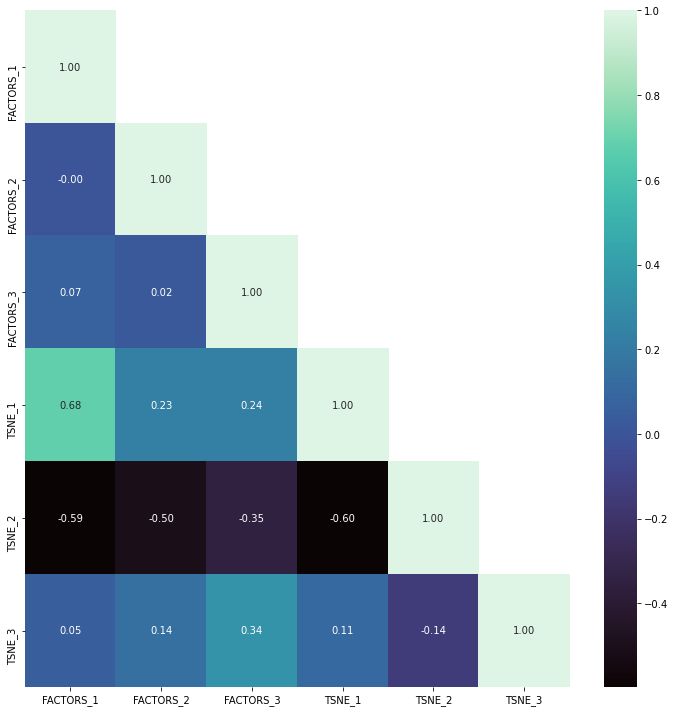

In [14]:
corr_embeddings = merged[["FACTORS_1", "FACTORS_2", "FACTORS_3", "TSNE_1", "TSNE_2", "TSNE_3"]].corr()
lower_corr = corr_embeddings.where(np.tril(np.ones(corr_embeddings.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
corr_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = corr_hmap.get_figure()
fig.tight_layout()
fig.savefig("embeddings_heatmap.png")

## Factor Analysis vs. tSNE

Looks like these two things may be getting at different aspects of the data, for the most part.

Although, TSNE_1 and FACTOR_1 are 68% correlated!

In [15]:
merged.shape

(2873, 71)

## KMeans Clustering on tSNE

In [16]:
from sklearn.cluster import KMeans

k = 5

clustered_df = pd.DataFrame()
kmeans = KMeans(n_clusters=k)
KM_TSNE = kmeans.fit_predict(TSNE)
clustered_df["KM_TSNE"] = KM_TSNE
clustered_df


,KM_TSNE
0,0
1,0
2,1
3,0
4,3
...,...
2868,2
2869,3
2870,2
2871,3


In [17]:
merged = merged.iloc[:,0:71]
merged = merged.merge(clustered_df,  left_index=True, right_index=True)
merged.head()

,FIPS_STATE_CODE,FIPS_COUNTY_CODE,CNTY_BENE_CT,CNTY_BENE_USRS,CNTY_MEAN_AGE,CNTY_SEX_PROP,TOT_CNCR_CASES,TOT_STRKETIA_CASES,TOT_ESRD_CASES,CNTY_TOT_VSTS,...,HIGH_PROCS,DIVERSE_PROP,FACTORS_1,FACTORS_2,FACTORS_3,KM_FACTORS,TSNE_1,TSNE_2,TSNE_3,KM_TSNE
0,1.0,1.0,16,13,65.4,0.187500,3.0,3.0,5.0,112,...,1.0,0.312500,-0.250884,0.785873,-0.122812,1,1.858443,-3.334387,7.042188,0
1,1.0,3.0,95,65,70.3,0.463158,18.0,8.0,18.0,720,...,1.0,0.368421,0.659104,-0.431479,0.216796,3,8.747828,-1.609500,5.528738,0
2,1.0,5.0,14,12,72.4,0.642857,0.0,0.0,4.0,92,...,0.0,0.500000,-0.230425,-0.469385,0.223178,3,-11.704071,-3.519831,-4.749842,1
3,1.0,7.0,17,12,69.0,0.411765,2.0,3.0,4.0,152,...,1.0,0.294118,0.538031,0.253332,-0.200188,3,6.292965,-6.562319,6.507111,0
4,1.0,9.0,22,12,68.8,0.636364,4.0,1.0,4.0,86,...,0.0,0.409091,-0.354058,-1.479527,0.082009,2,-15.214913,10.004282,-2.384826,3


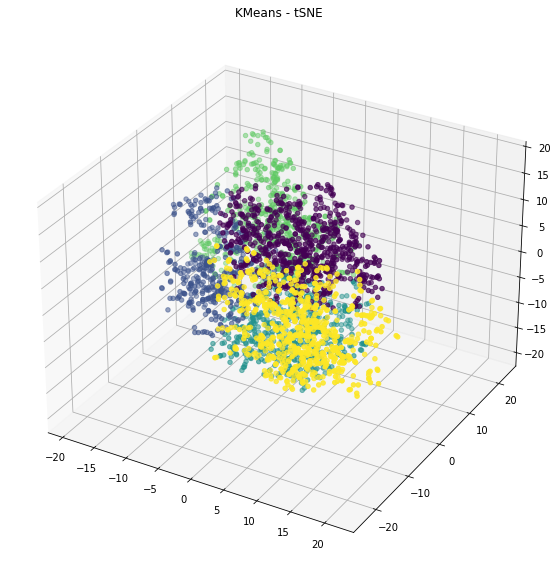

In [18]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
z = merged["TSNE_3"]
x = merged["TSNE_1"]
y = merged["TSNE_2"]
c = merged["KM_TSNE"]
ax.scatter(x, y, z, c=c)
ax.set_title('KMeans - tSNE')
plt.show()

In [19]:
merged["FIPS"] = FIPS
merged["STATE"] = STATE
merged["COUNTY"] = COUNTY
merged['FIPS_STATE_CODE'] = FIPS_STATE
merged['FIPS_COUNTY_CODE'] = FIPS_COUNTY
merged['CBSA'] = CBSA

merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 2872
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS_STATE_CODE        2873 non-null   float64
 1   FIPS_COUNTY_CODE       2873 non-null   float64
 2   CNTY_BENE_CT           2873 non-null   int64  
 3   CNTY_BENE_USRS         2873 non-null   int64  
 4   CNTY_MEAN_AGE          2837 non-null   float64
 5   CNTY_SEX_PROP          2873 non-null   float64
 6   TOT_CNCR_CASES         2873 non-null   float64
 7   TOT_STRKETIA_CASES     2873 non-null   float64
 8   TOT_ESRD_CASES         2873 non-null   float64
 9   CNTY_TOT_VSTS          2873 non-null   int64  
 10  CNTY_TOT_IP_VSTS       2873 non-null   int64  
 11  CNTY_TOT_OP_VSTS       2873 non-null   int64  
 12  CNTY_TOT_CODES         2873 non-null   float64
 13  CNTY_TOT_PROCS         2873 non-null   float64
 14  CNTY_MEAN_IP_STAY      2873 non-null   float64
 15  CNTY

In [20]:
merged.to_csv("/home/kylier/python/DS/data/PUF/PUF_RWJF_MERGED_CLUSTERED2.csv")